In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from clases.NeuronalNetwork import SimpleNeuralNetwork
from clases.Optimizer import SGDOptimizer, AdamOptimizer
from clases.Trainer import Trainer
from clases.LossFunction import *
from clases.ActivationFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [2]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [3]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:], data_train[0].astype(int)
X_val, Y_val = data_validation[1:], data_validation[0].astype(int)
X_test, Y_test = data_test[1:], data_test[0].astype(int)

### Train Data

#### SGD Optimizer

In [4]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

-------------------------------------------------------------------
| Epoch  1 | time:  0.23s | val loss 1.959 | valid accuracy 0.397 |
-------------------------------------------------------------------
| Epoch  2 | time:  0.19s | val loss 1.403 | valid accuracy 0.592 |
-------------------------------------------------------------------
| Epoch  3 | time:  0.18s | val loss 1.035 | valid accuracy 0.686 |
-------------------------------------------------------------------
| Epoch  4 | time:  0.20s | val loss 0.853 | valid accuracy 0.733 |
-------------------------------------------------------------------
| Epoch  5 | time:  0.21s | val loss 0.750 | valid accuracy 0.767 |
-------------------------------------------------------------------
| Epoch  6 | time:  0.18s | val loss 0.684 | valid accuracy 0.784 |
-------------------------------------------------------------------
| Epoch  7 | time:  0.20s | val loss 0.637 | valid accuracy 0.805 |
------------------------------------------------

In [5]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8630952380952381


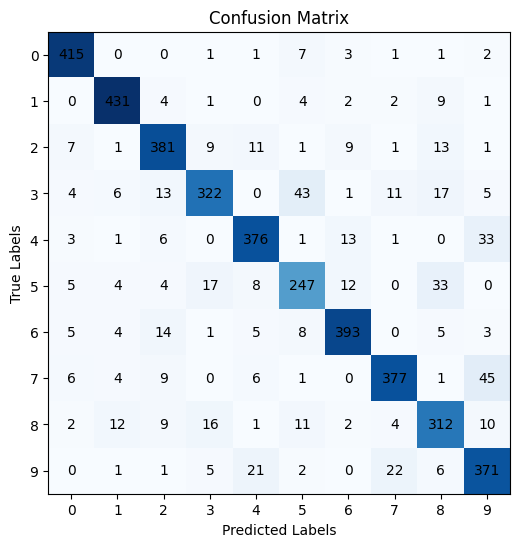

In [6]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Adam Optimizer

In [7]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

-------------------------------------------------------------------
| Epoch  1 | time:  0.19s | val loss 0.954 | valid accuracy 0.727 |
-------------------------------------------------------------------
| Epoch  2 | time:  0.20s | val loss 0.567 | valid accuracy 0.830 |
-------------------------------------------------------------------
| Epoch  3 | time:  0.17s | val loss 0.451 | valid accuracy 0.875 |
-------------------------------------------------------------------
| Epoch  4 | time:  0.20s | val loss 0.399 | valid accuracy 0.887 |
-------------------------------------------------------------------
| Epoch  5 | time:  0.18s | val loss 0.363 | valid accuracy 0.898 |
-------------------------------------------------------------------
| Epoch  6 | time:  0.22s | val loss 0.343 | valid accuracy 0.902 |
-------------------------------------------------------------------
| Epoch  7 | time:  0.32s | val loss 0.330 | valid accuracy 0.904 |
------------------------------------------------

In [8]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9185714285714286


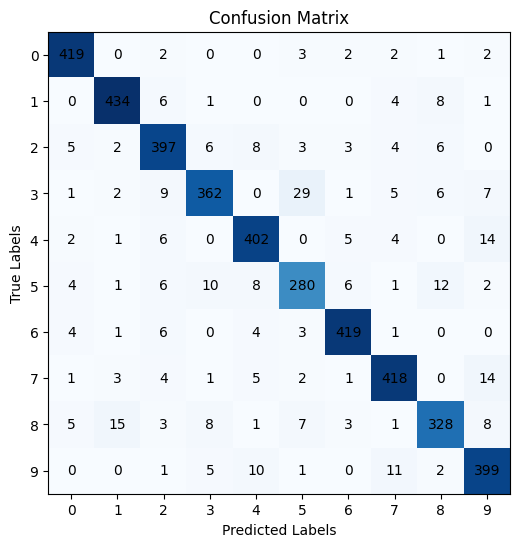

In [9]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))